In [1]:
import numpy as np
import matplotlib.pyplot as plt


with open("data_inputs/day10_input.txt") as f:
    data = f.read()

original_data = data

# ---- Part 1 ----

map_pipes = {
    ".": "0", 
    "|": "1", 
    "-": "2", 
    "L": "3", 
    "J": "4", 
    "7": "5", 
    "F": "6", 
    "S": "7"
}

for k, v in map_pipes.items():
    data = data.replace(k, v)

map_pipes = np.array([[int(n) for n in line] for line in data.split("\n")], dtype=np.int8)

map_pipes, map_pipes.shape

(array([[6, 3, 5, ..., 6, 6, 2],
        [6, 2, 5, ..., 6, 4, 4],
        [3, 6, 4, ..., 5, 2, 2],
        ...,
        [1, 5, 3, ..., 4, 0, 1],
        [2, 2, 5, ..., 3, 6, 1],
        [1, 4, 1, ..., 0, 2, 3]], dtype=int8),
 (140, 140))

In [ ]:


for l in original_data.split("\n")[75:83]:
    print(l[80:90])

start_pos: (79, 85)

start_dir (-1, 0)
dir pos: (-1, 0) [78 85]


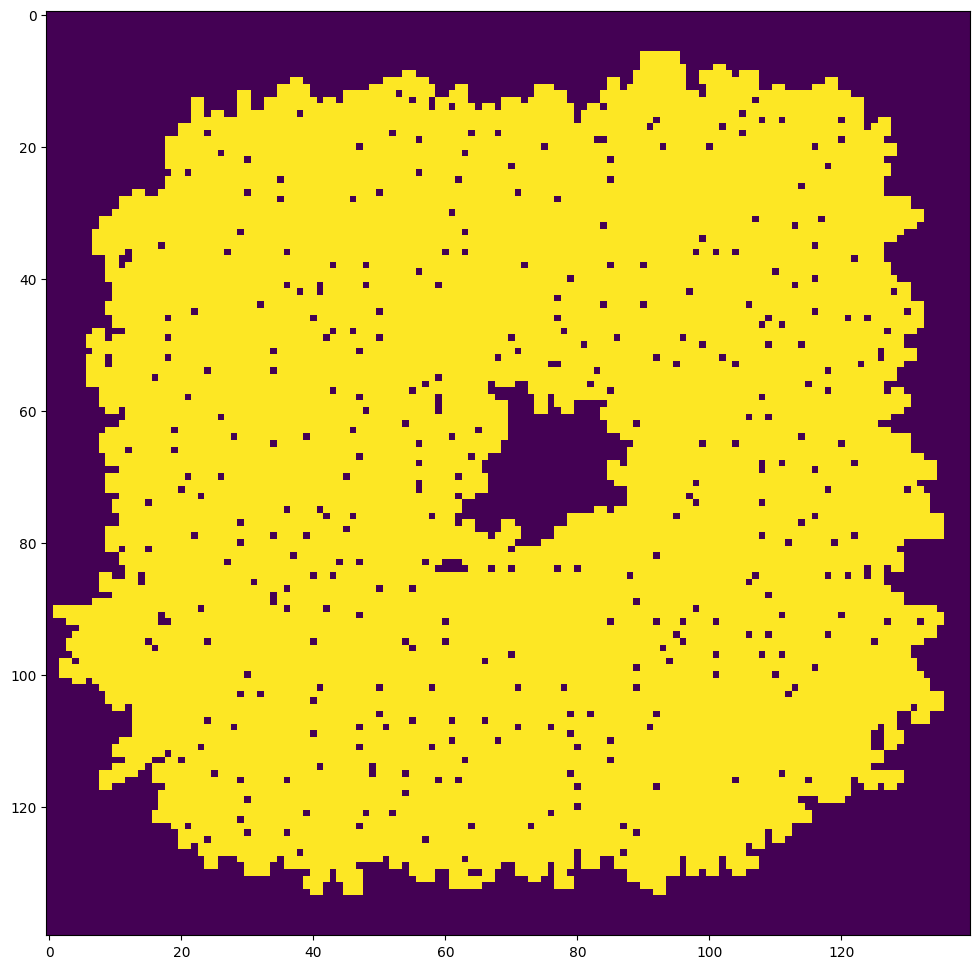

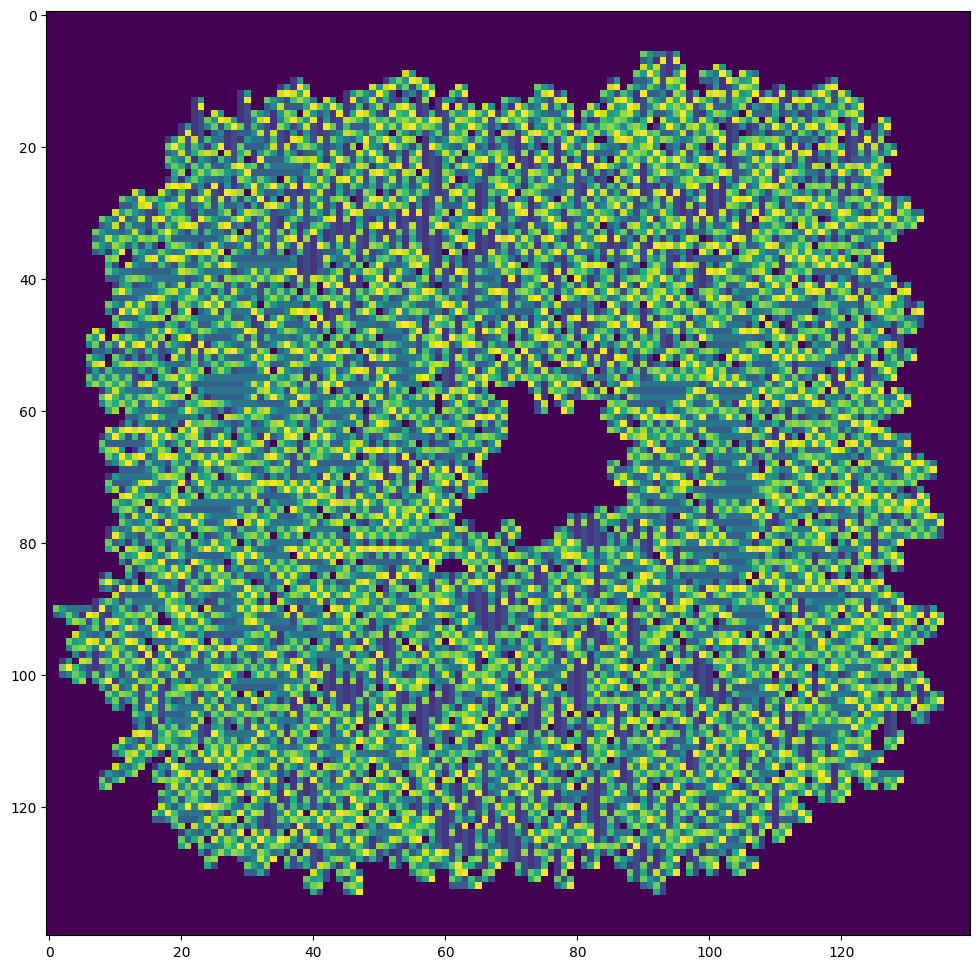


start_dir (1, 0)


Result 1: 6613


In [34]:
check_connected = {
    0: None,                                            # .
    1: {(-1, 0): [1, 5, 6, 7], (1, 0): [1, 3, 4, 7]},   # |
    2: {(0, -1): [2, 3, 6, 7], (0, 1): [2, 4, 5, 7]},   # -
    3: {(-1, 0): [1, 5, 6, 7], (0, 1): [2, 4, 5, 7]},   # L
    4: {(-1, 0): [1, 5, 6, 7], (0, -1): [2, 3, 6, 7]},  # J
    5: {(0, -1): [2, 3, 6, 7], (1, 0): [1, 3, 4, 7]},   # 7
    6: {(1, 0): [1, 3, 4, 7], (0, 1): [2, 4, 5, 7]},    # F
    7: {(-1, 0): [1, 5, 6], (1, 0): [1, 3, 4], (0, -1): [2, 3, 6], (0, 1): [2, 4, 5]}   # S
}

# up: 1, down: 2, left: 3, right: 4, up-left: 5, up-right: 6, down-left: 7, down-right: 8, left-up: 9, left-down: 10, right-up: 11, right-down: 12
conn_dirs = {
    ((-1, 0), (-1, 0)): 1,
    ((1, 0), (1, 0)): 2,
    ((0, -1), (0, -1)): 3,
    ((0, 1), (0, 1)): 4,
    ((-1, 0), (0, -1)): 5,
    ((-1, 0), (0, 1)): 6,
    ((1, 0), (0, -1)): 7,
    ((1, 0), (0, 1)): 8,
    ((0, -1), (-1, 0)): 9,
    ((0, -1), (1, 0)): 10,
    ((0, 1), (-1, 0)): 11,
    ((0, 1), (1, 0)): 12,
}

start_pos = np.where(map_pipes == 7)
start_pos = (start_pos[0][0], start_pos[1][0])
print("start_pos:", start_pos)
found = False

paths = {}
conn_maps = []
dir_maps = []

for start_dir in check_connected[7]:
    print("\nstart_dir", start_dir)
    if found:
        break

    map_connected = np.ones(map_pipes.shape, dtype=np.int8) * -1
    map_conn_dirs = np.ones(map_pipes.shape, dtype=np.int8) * -1

    pos = np.array(start_pos) + np.array(start_dir)
    paths[start_dir] = [pos]
    
    if map_pipes[*pos] not in check_connected[7][start_dir]:
        print("no start ---", start_dir, pos)
        continue
    
    prev_dir = np.array(start_dir)

    print("dir pos:", start_dir, pos)
    if map_pipes[*pos] in check_connected[7][start_dir]:
        map_connected[*pos] = 1
        is_next_pipe = True
        while not found and is_next_pipe:
            
            for dir in check_connected[map_pipes[*pos]]:
                # print("prev dir dir", prev_dir, pos, map_pipes[*pos], dir)
                if np.all(prev_dir + dir == [0, 0]):
                    continue

                new_pos = pos + np.array(dir)
                # print("pos:", pos, " new_pos:", new_pos, dir, map_pipes[*new_pos], check_connected[map_pipes[*pos]][dir])
                if map_pipes[*new_pos] in check_connected[map_pipes[*pos]][dir]:
                    map_connected[*new_pos] = 1
                    map_conn_dirs[*new_pos] = conn_dirs[(tuple(prev_dir), tuple(dir))]
                    prev_dir = np.array(dir)
                    pos = new_pos
                    paths[start_dir].append(pos)
                    if tuple(new_pos) == start_pos:
                        found = True
                    break

                else:
                    is_next_pipe = False
                    break

        conn_maps.append(map_connected)
        dir_maps.append(map_conn_dirs)
        plt.figure(figsize=(12, 12))
        plt.imshow(map_connected)
        plt.show()

        plt.figure(figsize=(12, 12))
        plt.imshow(map_conn_dirs)
        plt.show()
        
max_path = max([len(p) for p in paths.values()])

print("\n\nResult 1:", int(max_path / 2))

In [32]:
# -1: not checked, 0: not enclosed, 1: enclosed, 2: conn pipe

enclosed_map = np.ones(map_pipes.shape, dtype=np.int8) * -1
enclosed_map[map_connected == 1] = 2

np.sum(enclosed_map == 2), np.sum(enclosed_map == 1), np.sum(enclosed_map == 0), np.sum(enclosed_map == -1)

(13226, 0, 0, 6374)

In [20]:


while sum(enclosed_map == -1) > 0:
    for i in range(0, enclosed_map.shape[0]):
        for j in range(0, enclosed_map.shape[1]):
            if enclosed_map[i, j] == -1:
                

Result 1: 6613
